<a href="https://colab.research.google.com/github/ahd-rafi/Machine-Learning-Projects/blob/main/Machine_Learning_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LESSON 1**

Linear Regression and Gradient Descent

Jovian Link:

https://jovian.ai/aakashns/python-sklearn-linear-regression


In [ ]:
medical_charges_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7decc7449c00>)

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv('medical.csv')

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
!pip install jovian --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 3.4 MB/s eta 0:00:00


**EDA AND VISUALIZATION**

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal = 'box',
                   nbins = 47,
                   title = 'Distribution of Age')

fig.update_layout(bargap = 0.1)
fig.show()


In [ ]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = 'box',
                   color_discrete_sequence = ['red'],
                   title = 'Distribution of BMI (Body Mass Index)')

fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal  ='box',
                   color = 'smoker',
                   color_discrete_sequence = ['green', 'gray'],
                   title = 'Annual Medical Charges')

fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x = 'region',
                   y = 'charges',
                   marginal = 'box',
                   color = 'sex',
                   color_discrete_sequence  =['green', 'red'],
                   title = 'Medical charges by Sex and Region')

fig.update_layout(bargap = 0.1)
fig.show()


In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
fig = px.histogram(medical_df, x = 'smoker', color = 'sex', title = 'smoker')

fig.show()

In [ ]:
fig = px.histogram(medical_df, x = 'region', color = 'sex', title = 'smoker')

fig.show()

In [ ]:
fig = px.scatter(medical_df,
                 x = 'age',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'Age vs Charges')

fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
fig = px.scatter(medical_df,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'BMI vs Charges')

fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
fig = px.violin(medical_df,
                x = 'children',
                y = 'charges')

fig.show()

**Correlation**

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [ ]:
medical_df.smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric.head()

,smoker
0,1
1,0
2,0
3,0
4,0


In [ ]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
import numpy as np
medical_df.select_dtypes(np.number).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

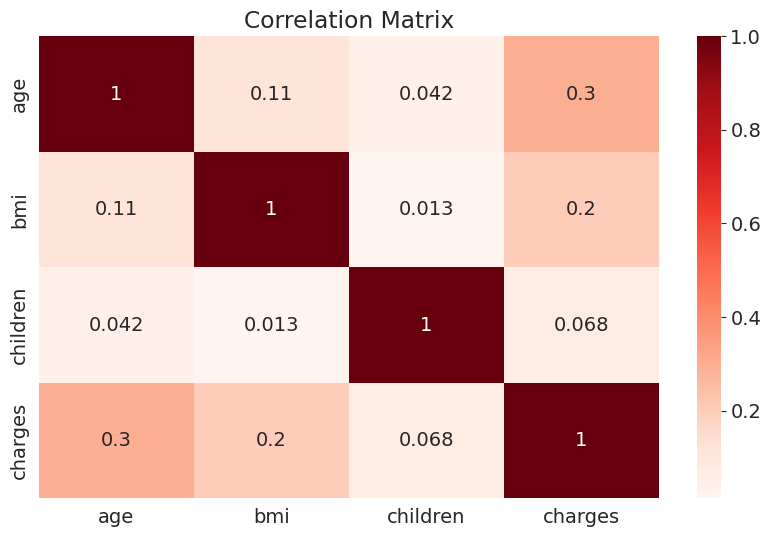

In [ ]:
sns.heatmap(medical_df.select_dtypes(np.number).corr(), cmap = 'Reds', annot = True)
plt.title('Correlation Matrix')

**LINEAR REGRESSION USING A SINGLE FEATURE**

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

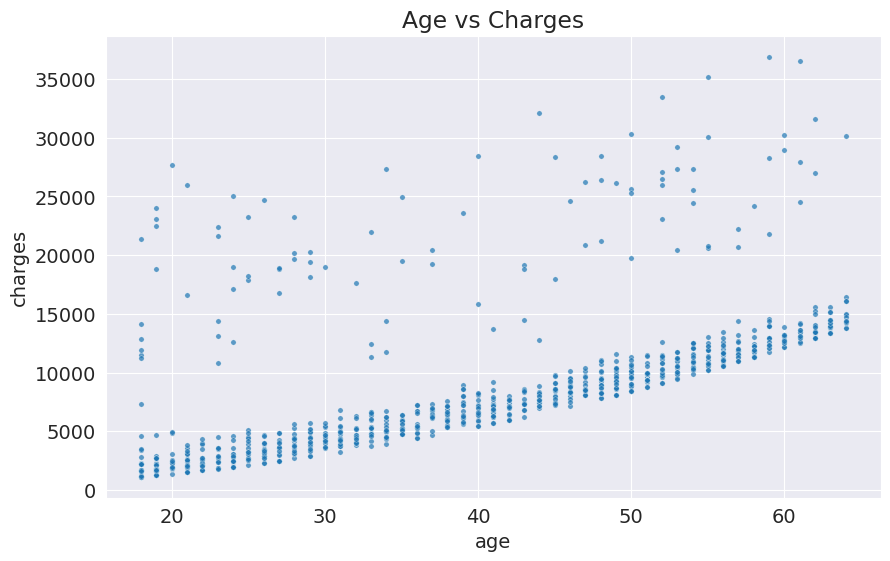

In [ ]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 15)

In [ ]:
def estimate_charges(age, w, b):
  return w * age + b

In [ ]:
w = 50
b = 100

In [ ]:
estimate_charges(40, w, b)

2100

In [ ]:
print(medical_df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [ ]:
ages = non_smoker_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
6,46
7,37
8,37
9,60
10,25


In [ ]:
estimate_charges  = estimate_charges(ages, w, b)
estimate_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
6,2400
7,1950
8,1950
9,3100
10,1350


In [ ]:
non_smoker_df.charges

,charges
1,1725.552300
2,4449.462000
3,21984.470610
4,3866.855200
5,3756.621600
6,8240.589600
7,7281.505600
8,6406.410700
9,28923.136920
10,2721.320800


Text(0, 0.5, 'Estimates Charges')

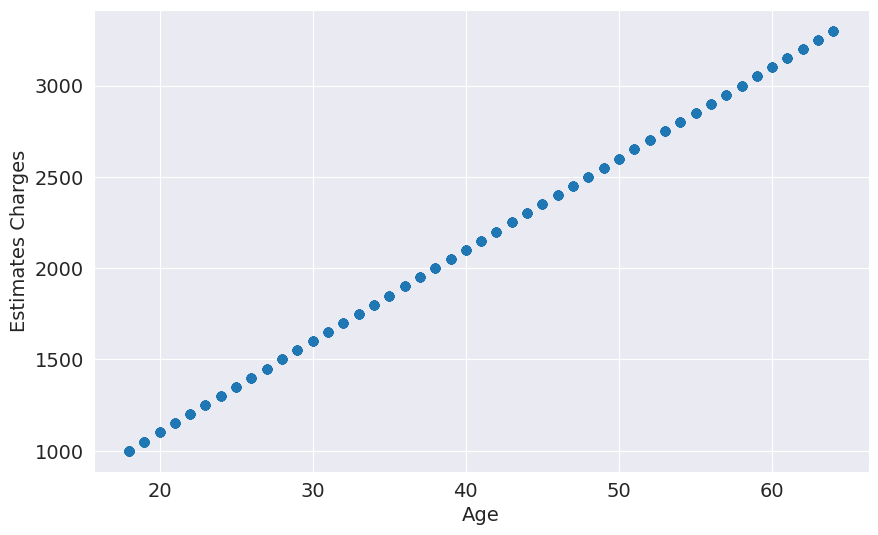

In [ ]:
plt.scatter(ages, estimate_charges)
plt.xlabel('Age')
plt.ylabel('Estimates Charges')

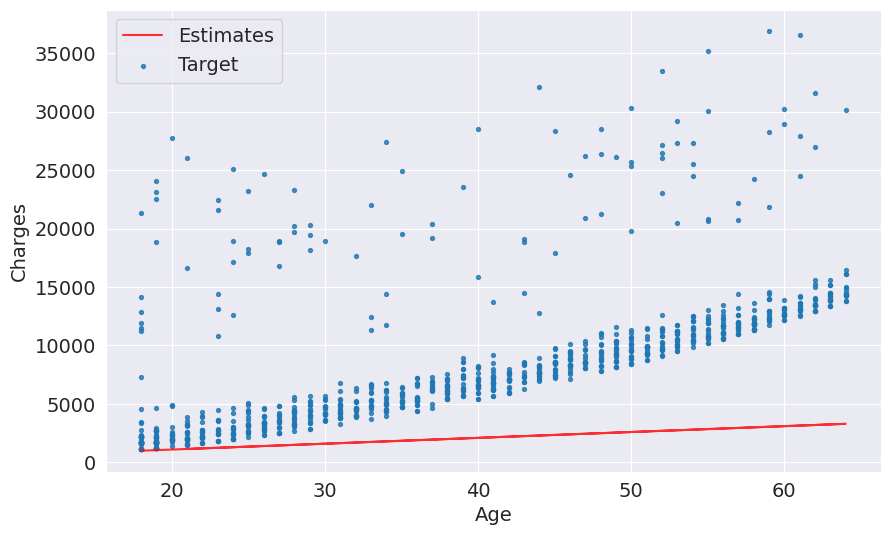

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimate_charges, 'r' , alpha = 0.8)

plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimates', 'Target'])

In [ ]:
def estimate_charges(age, w, b):
  return w * age + b


def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  # estimate_charges = w * ages + b
  estimate_charge = estimate_charges(ages, w, b)

  plt.plot(ages, estimate_charge, 'r' , alpha = 0.8)

  plt.scatter(ages, target, s = 8, alpha = 0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimates', 'Actual'])

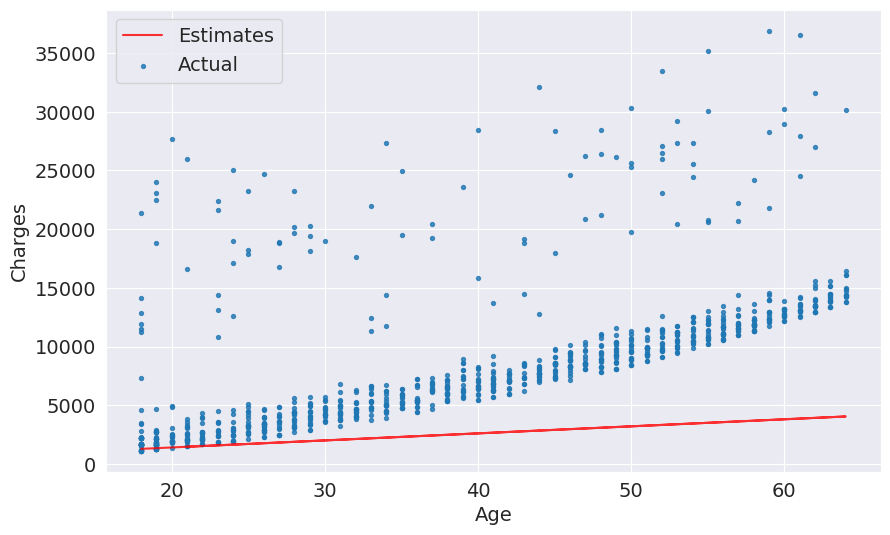

In [ ]:
try_parameters(60, 200)

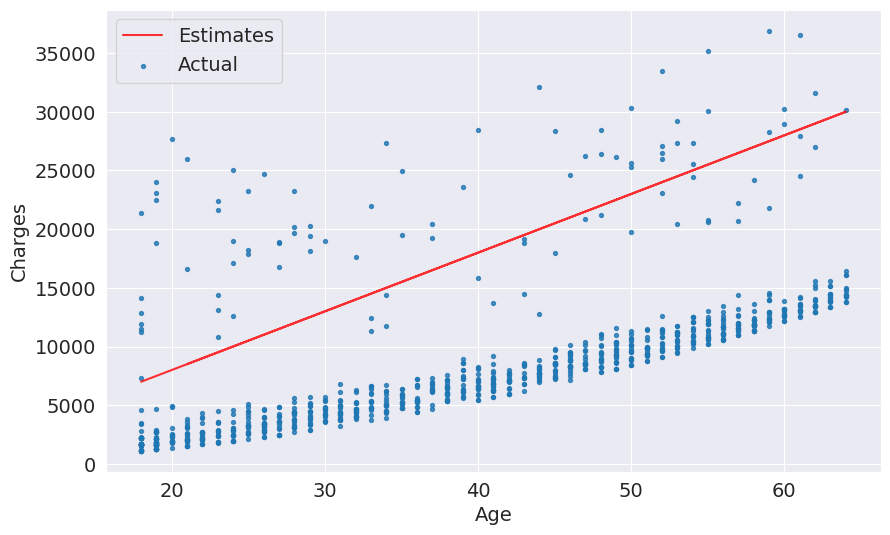

In [ ]:
try_parameters(500, -2000)

In [ ]:
target = non_smoker_df.charges
target

,charges
1,1725.552300
2,4449.462000
3,21984.470610
4,3866.855200
5,3756.621600
6,8240.589600
7,7281.505600
8,6406.410700
9,28923.136920
10,2721.320800


In [ ]:
predicted = estimate_charges(non_smoker_df.age, w, b)
predicted

,age
1,1000
2,1500
3,1750
4,1700
5,1650
6,2400
7,1950
8,1950
9,3100
10,1350


In [ ]:
def rmse(target, predicted):
  return np.sqrt(np.mean(np.square(target - predicted)))

In [ ]:
w = 50
b = 100

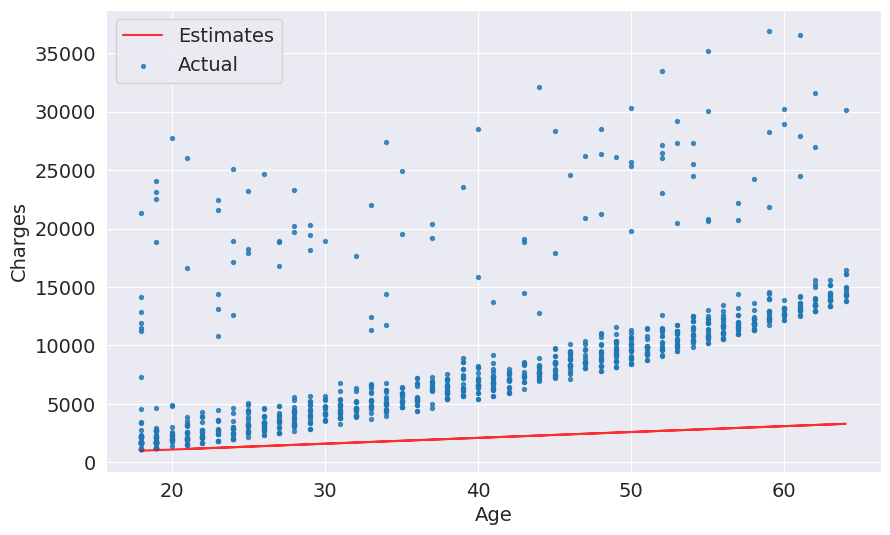

In [ ]:
try_parameters(w, b)

In [ ]:
target = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(target, predicted)

8461.949562575493

In [ ]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  predicted  = estimate_charges(ages, w, b)

  plt.plot(ages, predicted, 'r', alpha = 0.8)

  plt.scatter(ages, target, s = 8, alpha = 0.8)
  plt.xlabel('Age')
  plt.ylabel('charges')
  plt.legend(['Predicted', 'Actual'])

  loss = rmse(target, predicted)
  print('RMSE Loss : ', loss)


RMSE Loss :  4662.517389792381


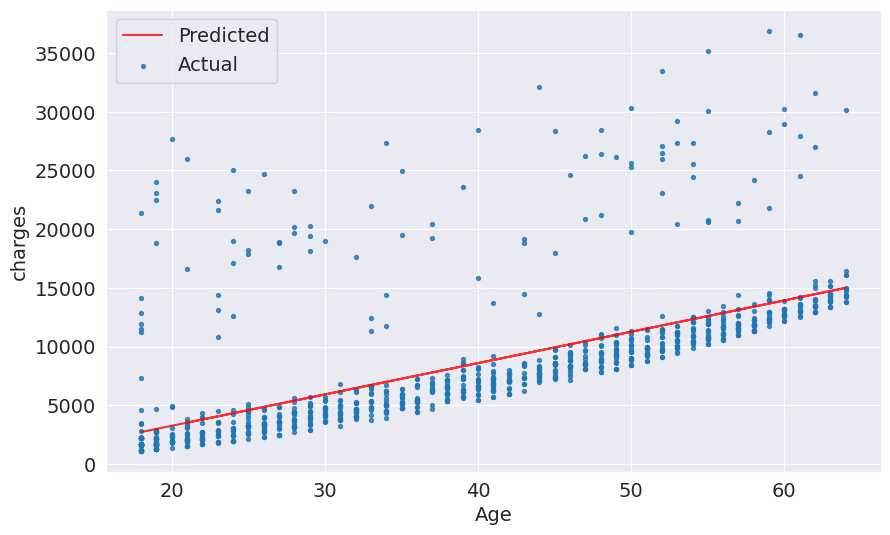

In [ ]:
try_parameters(350, -5300)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('Input shape: ', inputs.shape)
print('Target shape: ', targets.shape)


Input shape:  (1064, 1)
Target shape:  (1064,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
model.predict(np.array([[23],
                         [37],
                         [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
targets

,charges
1,1725.552300
2,4449.462000
3,21984.470610
4,3866.855200
5,3756.621600
6,8240.589600
7,7281.505600
8,6406.410700
9,28923.136920
10,2721.320800


In [ ]:
rmse(targets, predictions)

4662.505766636395

In [ ]:
model.score(inputs, targets)

0.3943171632425906

In [ ]:
#w
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

-2091.4205565650864

RMSE Loss :  4662.505766636395


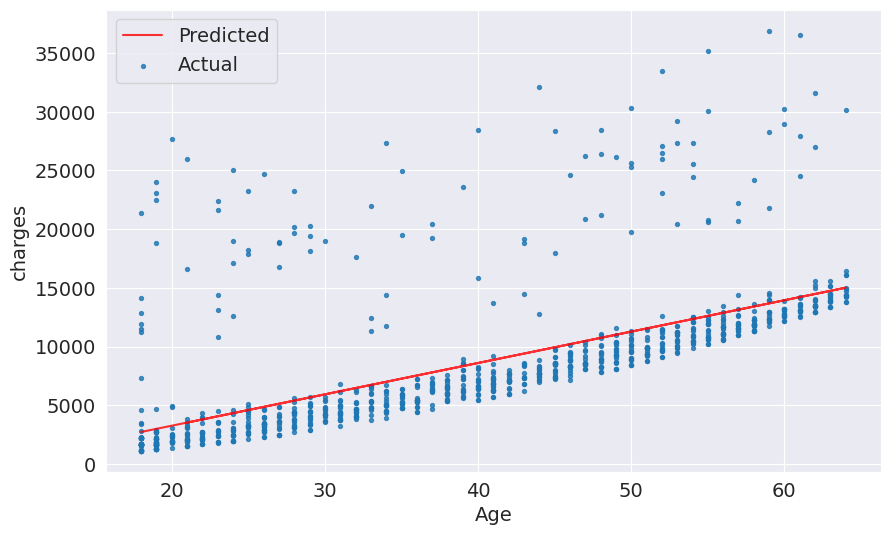

In [ ]:
try_parameters(model.coef_, model.intercept_)